In [1]:
%matplotlib inline
%run 'notebook_utils.py'

import sys
import pprint
import cProfile

import matplotlib.pyplot as plt
import numpy             as np

import radical.utils     as ru
import radical.pilot     as rp
import radical.analytics as ra

from   radical.utils.profile import *
from   radical.pilot.states  import *
import glob


In [2]:
# Load wrangled data saved in .csv files for both synapse, microbenchmarks and gromacs.
sessions = pd.read_csv('../ties_esmacs_ss/sessions.csv', index_col=0)
pilots = pd.read_csv('../ties_esmacs_ss/pilots.csv', index_col=0)
units = pd.read_csv('../ties_esmacs_ss/units.csv', index_col=0)

In [3]:
print 'Synapse: Weak Scaling: Total number of successful runs: %s' % sessions.shape[0]
print 'Synapse: Weak Scaling: Total number of pilots: %s' % pilots.shape[0]
print 'Synapse: Weak Scaling: Total number of units: %s\n' % units.shape[0]

Synapse: Weak Scaling: Total number of successful runs: 2
Synapse: Weak Scaling: Total number of pilots: 2
Synapse: Weak Scaling: Total number of units: 2880



## Get timestamps for all units in `cu_exec_start`, `cu_exec_stop`

In [57]:
# Load only the 1 generation strong scaling using heterogeneous protocols (4 ESMACS, 4 TIES)
rp_folder = glob.glob('../ties_esmacs_new_rC/exp1/rp.*')
src = rp_folder[0]
session = ra.Session(stype='radical.pilot', src=src)
# units = session.filter(etype='unit', uid=units[:3])
events = session.list('event')

# Ask Andre about this sorting function

units  = session.filter(etype=['unit'],
         state=[rp.DONE]).filter(uid=sorted(session.list('uid'))[:10])


data=[]
stop_data = []
unit_ids = []

for unit in units.get():
    print unit.uid
    unit_ids.append(unit.uid)
    data.append(unit.timestamps(event=[{ru.EVENT: 'cu_exec_start'}]))
    stop_data.append(unit.timestamps(event = [{ru.EVENT: 'cu_exec_stop'}]))
data = pd.DataFrame(data, columns = ['cu_exec_start'])
data # show all data for 720 units
stop_data = pd.DataFrame(stop_data, columns = ['cu_exec_stop'])
data['cu_exec_stop'] = stop_data
data

unit.000009
unit.000008
unit.000003
unit.000002
unit.000001
unit.000000
unit.000007
unit.000006
unit.000005
unit.000004


,cu_exec_start,cu_exec_stop
0,8955.0213,9016.4482
1,8954.9753,9016.7328
2,8954.7334,9016.9430
3,8954.6856,9017.5682
4,8954.6390,9016.3277
5,8954.5892,9016.7116
6,8954.9321,9016.4556
7,8954.8766,9017.2420
8,8954.8287,9017.3157
9,8954.7839,9016.2726


In [56]:
rp_folder = glob.glob('../ties_esmacs_new_rC/exp1/rp.*')
src = rp_folder[0]
session = ra.Session(stype='radical.pilot', src=src)

events = session.list('event')
# units  = session.filter(etype=['unit'],
#          state=[rp.DONE]).filter(uid=sorted(session.list('uid')))

units = session.filter(etype='unit', uid=['unit.000000','unit.000049',
                                       'unit.000050','unit.000179',
                                       'unit.000180','unit.000229',
                                       'unit.000230','unit.000359',
                                       'unit.000360','unit.000409',
                                       'unit.000410','unit.000539',
                                       'unit.000540','unit.000589',
                                       'unit.000590','unit.000719'], inplace=True)

data=[]
stop_data = []
units_ids = ['unit.000000','unit.000049',
               'unit.000050','unit.000179',
               'unit.000180','unit.000229',
               'unit.000230','unit.000359',
               'unit.000360','unit.000409',
               'unit.000410','unit.000539',
               'unit.000540','unit.000589',
               'unit.000590','unit.000719']

data = units.timestamps(event = [{ru.EVENT: 'cu_exec_start'}])
stop_data = units.timestamps(event = [{ru.EVENT: 'cu_exec_stop'}])
data = pd.DataFrame(data, columns = ['cu_exec_start'], index = units_ids)
stop_data = pd.DataFrame(stop_data, columns = ['cu_exec_stop'], index = units_ids)

df = pd.concat([data, stop_data],  axis=1)
df



# for unit in units.get():
#     print unit.uid
#     unit_ids.append(unit.uid)
#     data.append(unit.timestamps(event=[{ru.EVENT: 'cu_exec_start'}]))
#     stop_data.append(unit.timestamps(event = [{ru.EVENT: 'cu_exec_stop'}]))
# data = pd.DataFrame(data, columns = ['cu_exec_start'])
# data # show all data for 720 units
# stop_data = pd.DataFrame(stop_data, columns = ['cu_exec_stop'])
# data['cu_exec_stop'] = stop_data
# data



,cu_exec_start,cu_exec_stop
unit.000000,8954.5892,9006.0982
unit.000049,8960.5642,9016.7116
unit.000050,8960.5766,9023.5279
unit.000179,8977.1212,9028.8363
unit.000180,9030.0415,9154.1877
unit.000229,9906.5978,10030.4901
unit.000230,9907.3793,10901.5818
unit.000359,10893.0461,11110.4476
unit.000360,10893.0678,11168.8867
unit.000409,11025.1707,11302.9135


Each subplot presents the data for an EnTK stag

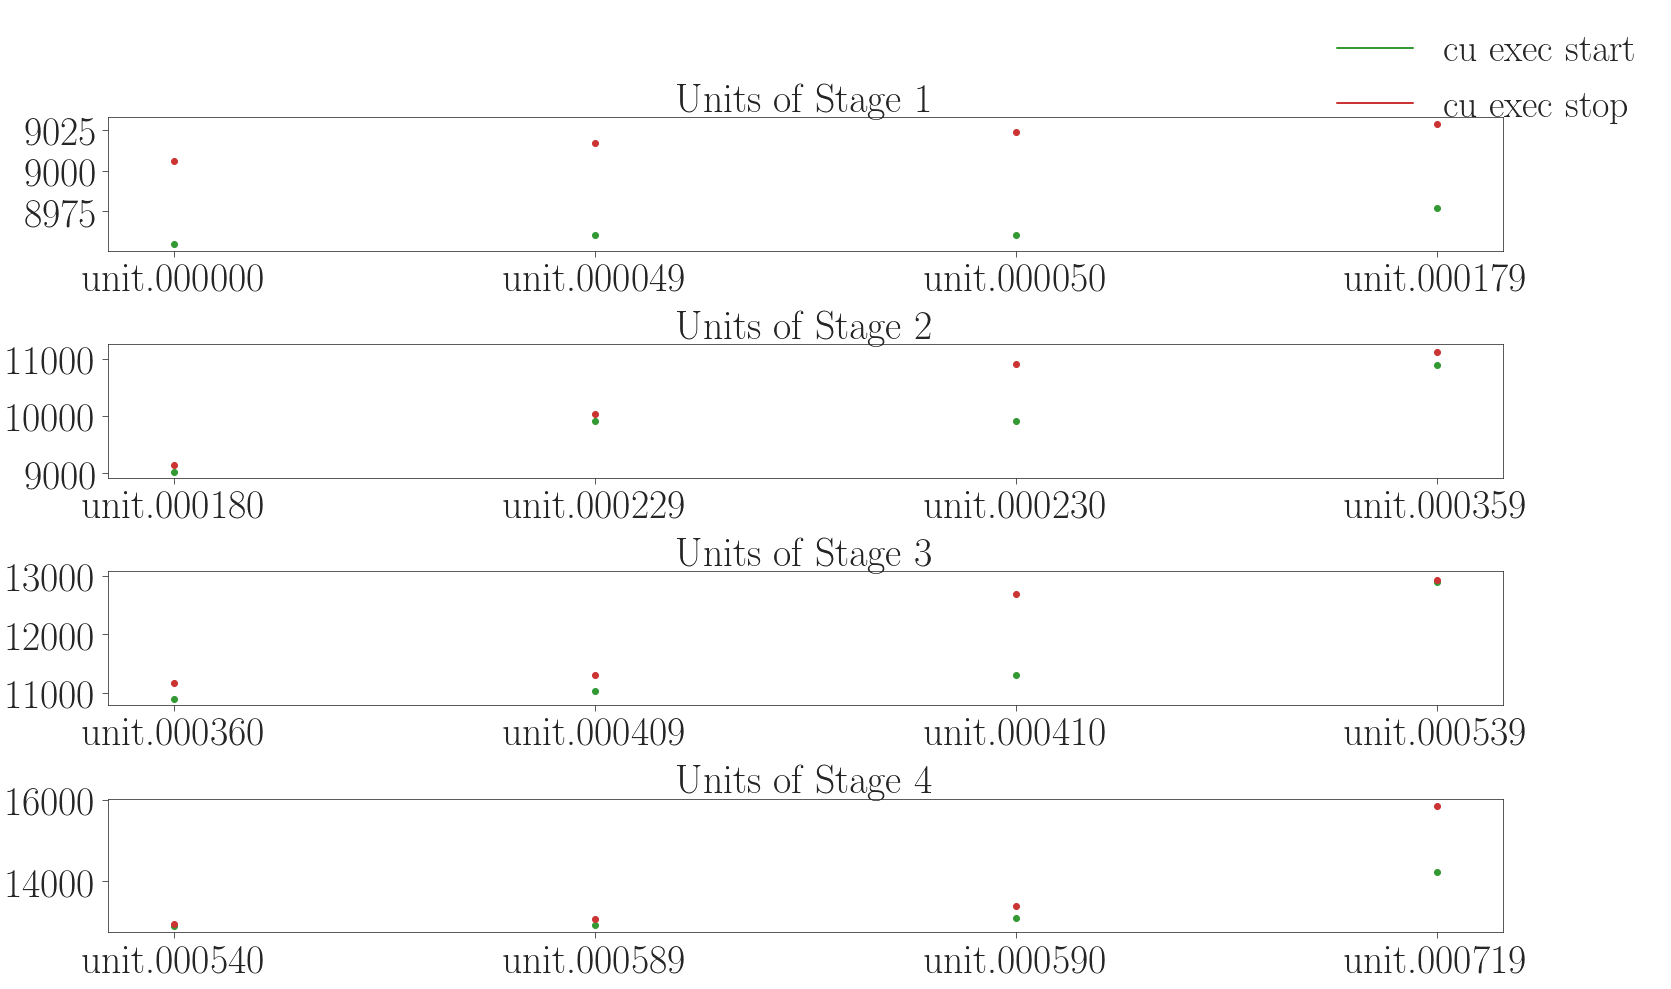

In [101]:
# nunits = concurrent units 
nunits = [1,2,3,4]
fwidth = 32
fhight = 10

fig, axarr = plt.subplots(4, figsize=(25,15))
axarr[0].scatter(df.iloc[0:4]['cu_exec_start'].index, df.iloc[0:4]['cu_exec_start'],  marker='o', color=tableau20[4])
axarr[0].scatter(df.iloc[0:4]['cu_exec_start'].index, df.iloc[0:4]['cu_exec_stop'],  marker='o', color=tableau20[6])
axarr[0].set_title('Units of Stage 1')


axarr[1].scatter(df.iloc[4:8]['cu_exec_start'].index, df.iloc[4:8]['cu_exec_start'],  marker='o', color=tableau20[4])
axarr[1].scatter(df.iloc[4:8]['cu_exec_start'].index, df.iloc[4:8]['cu_exec_stop'],  marker='o', color=tableau20[6])
axarr[1].set_title('Units of Stage 2')


axarr[2].scatter(df.iloc[8:12]['cu_exec_start'].index, df.iloc[8:12]['cu_exec_start'],  marker='o', color=tableau20[4])
axarr[2].scatter(df.iloc[8:12]['cu_exec_start'].index, df.iloc[8:12]['cu_exec_stop'],  marker='o', color=tableau20[6])
axarr[2].set_title('Units of Stage 3')

axarr[3].scatter(df.iloc[12:16]['cu_exec_start'].index, df.iloc[12:16]['cu_exec_start'],  marker='o', color=tableau20[4])
axarr[3].scatter(df.iloc[12:16]['cu_exec_start'].index, df.iloc[12:16]['cu_exec_stop'],  marker='o', color=tableau20[6])
axarr[3].set_title('Units of Stage 4')

fig.subplots_adjust(hspace=0.7)

fig.legend((
                mpl.lines.Line2D([], [], color=tableau20[4]),
                mpl.lines.Line2D([], [], color=tableau20[6] ) 
           ),
           (
                'cu exec start',
                'cu exec stop'
           ))
#            'upper center',
#            bbox_to_anchor=(0.6, 1),
#            fontsize=20,
#             ncol=6)

plt.savefig('heterogeneous_protocols_CUs.pdf', dpi=300, bbox_inches='tight')
plt.savefig('heterogeneous_protocols_CUs.png', dpi=300, bbox_inches='tight')
